# Redshift Distributions and Tomographic Binning

In this notebook, we will plot the redshift distributions and the tomographic binning for the JMAS and SRD redshift distributions. We will also plot the redshift distributions for the SRD redshift distributions using the GAMA luminosity functions.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from processing import helpers as h

In [2]:
data_path = "jmas_data/redshift_distributions/"
redshift_range = np.load(f"{data_path}redshift_range.npy")
sources = np.load(f"{data_path}redshift_distributions.npy",
                                 allow_pickle=True).item()
sources_binned = np.load(f"{data_path}redshift_distributions_binned.npy",
                                    allow_pickle=True).item()

In [3]:
# Set plot parameters
plt.rcParams.update({
    "lines.linewidth": 2.5,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "axes.grid": False,
})
jmas_colors = h.jmas_colors
dpi = h.dpi

## Comparison of JMAS and SRD Redshift Distributions

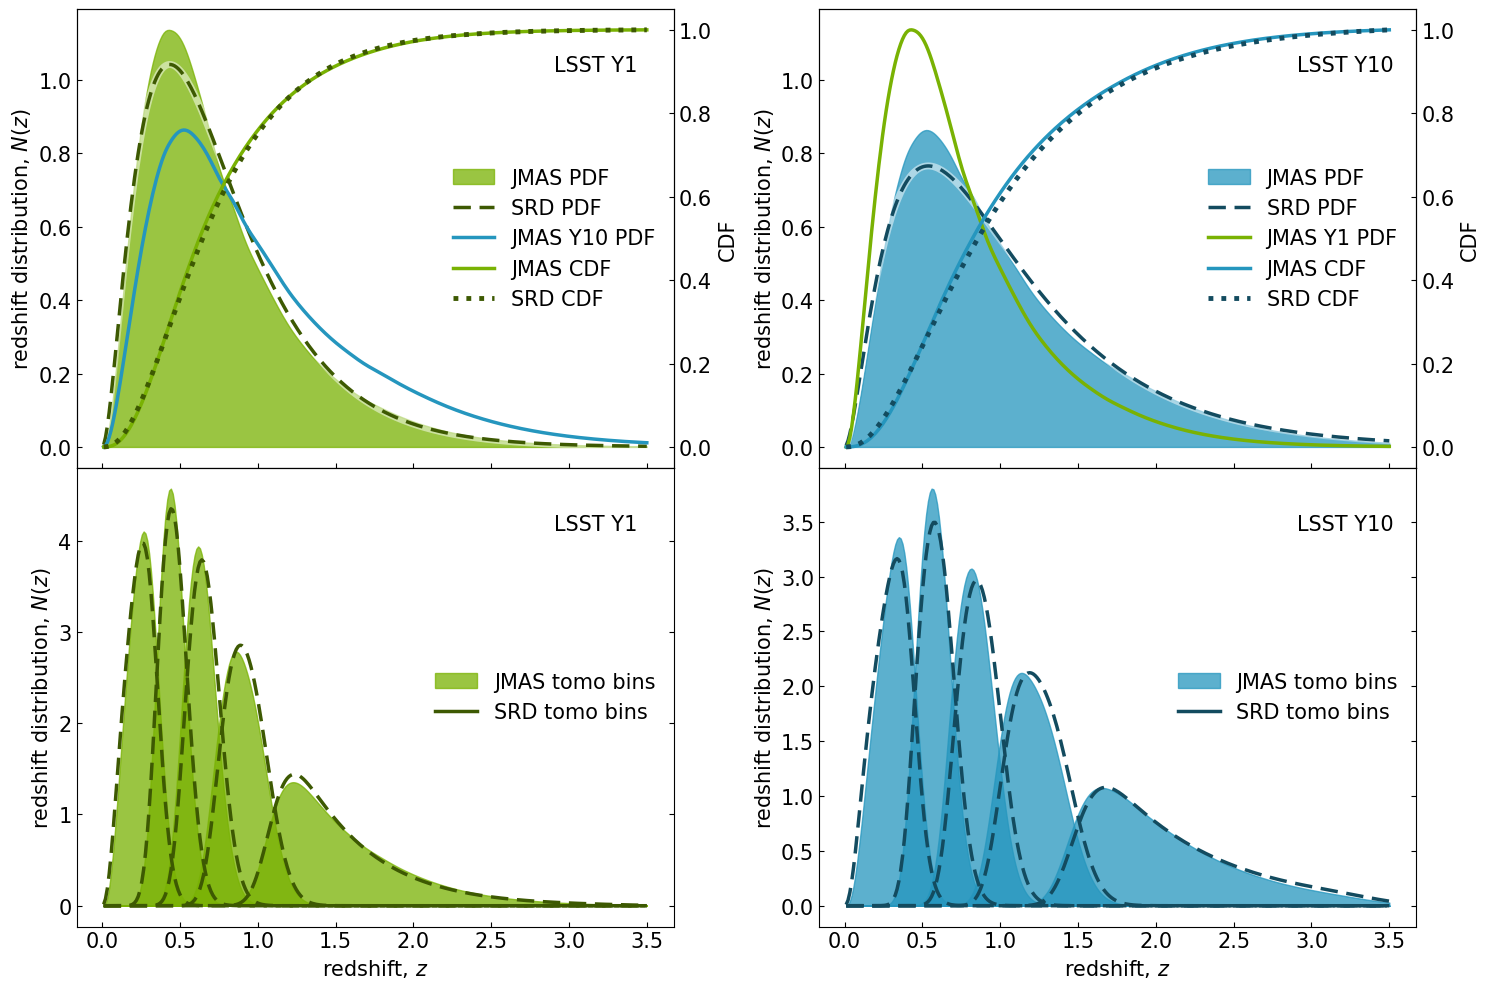

In [4]:
# Set up the figure and axes
fig, axs = plt.subplots(2, 2,
                        figsize=(15, 10), 
                        sharex=True,
                        gridspec_kw={'height_ratios': [1, 1], 'hspace': 0})

cumulative_srd_y1 = np.cumsum(sources["srd_y1"]) / np.sum(sources["srd_y1"])
cumulative_jmas_y1 = np.cumsum(sources["jmas_y1"]) / np.sum(sources["jmas_y1"])
cumulative_srd_y10 = np.cumsum(sources["srd_y10"]) / np.sum(sources["srd_y10"])
cumulative_jmas_y10 = np.cumsum(sources["jmas_y10"]) / np.sum(sources["jmas_y10"])
    
alpha, lw = 0.75, 2.5  # Transparency and line width
# Parameters for the glow effect
glow_width = lw * 2  # Width of the glow effect
glow_alpha = 0.5  # Transparency of the glow
dashes = (5, 2.5)

# Plot 1: LSST Y1 Redshift Distribution and CDF (Now Top Left)
ax_cdf1_y1 = axs[0, 0].twinx()
ax_cdf1_y1.tick_params(axis='both', direction='in') # For Y1

axs[0, 0].fill_between(redshift_range,
                       sources["jmas_y1"],
                       label="JMAS PDF",
                       color=jmas_colors["jmas_y1"], alpha=alpha)
# Glow behind the dashed line
axs[0, 0].plot(redshift_range,
               sources["srd_y1"],
               color="white", 
               lw=glow_width, 
               alpha=glow_alpha,
               ls='-')

# Original dashed line on top
axs[0, 0].plot(redshift_range, 
               sources["srd_y1"],
               label="SRD PDF", 
               color=jmas_colors["srd_y1"], 
               lw=lw, 
               ls="--")[0].set_dashes(dashes)

axs[0, 0].set_xlabel("redshift, $z$", fontsize=15)
axs[0, 0].set_ylabel("redshift distribution, $N(z)$", fontsize=15)

# CDF plots for Y1
ax_cdf1_y1.plot(redshift_range,
                cumulative_jmas_y1, 
                label="JMAS CDF",
                color=jmas_colors["jmas_y1"],
                linestyle="-", 
                lw=lw)
ax_cdf1_y1.plot(redshift_range,
                cumulative_srd_y1,
                label="SRD CDF",
                color=jmas_colors["srd_y1"], 
                linestyle=":", 
                lw=3.5)
ax_cdf1_y1.set_ylabel("CDF", fontsize=15)

axs[0, 0].plot(redshift_range, sources["jmas_y10"], label="JMAS Y10 PDF", color=jmas_colors["jmas_y10"], lw=lw)

# Create combined legend for both Y1 plots
lines, labels = axs[0, 0].get_legend_handles_labels()
lines2, labels2 = ax_cdf1_y1.get_legend_handles_labels()
axs[0, 0].legend(lines + lines2, labels + labels2, frameon=False, fontsize=15, loc="center right")

# Plot 2: LSST Y10 Redshift Distribution and CDF (Top Right)
ax_cdf2_y10 = axs[0, 1].twinx()
ax_cdf2_y10.tick_params(axis='both', direction='in') # For Y10

axs[0, 1].fill_between(redshift_range, 
                       sources["jmas_y10"],
                       color=jmas_colors["jmas_y10"],
                       label="JMAS PDF",
                       alpha=alpha)

# Glow behind the dashed line
axs[0, 1].plot(redshift_range,
               sources["srd_y10"], 
               color="white", 
               lw=glow_width,
               alpha=glow_alpha,
               ls='-')

# Original dashed line on top
axs[0, 1].plot(redshift_range,
               sources["srd_y10"], 
               label="SRD PDF",
               color=jmas_colors["srd_y10"],
               lw=lw, 
               ls="--")[0].set_dashes(dashes)
axs[0, 1].set_xlabel("redshift, $z$", fontsize=15)
axs[0, 1].set_ylabel("redshift distribution, $N (z)$", fontsize=15)

# CDF plots for Y10
ax_cdf2_y10.plot(redshift_range,
                 cumulative_jmas_y10,
                 label="JMAS CDF",
                 color=jmas_colors["jmas_y10"],
                 linestyle="-",
                 lw=lw)
ax_cdf2_y10.plot(redshift_range,
                 cumulative_srd_y10,
                 label="SRD CDF",
                 color=jmas_colors["srd_y10"], 
                 linestyle=":",
                 lw=3.5)

axs[0, 1].plot(redshift_range, 
               sources["jmas_y1"],
               label="JMAS Y1 PDF",
               color=jmas_colors["jmas_y1"],
               lw=lw)
ax_cdf2_y10.set_ylabel("CDF", fontsize=15)

# Create combined legend for both Y10 plots
lines_y10, labels_y10 = axs[0, 1].get_legend_handles_labels()
lines2_y10, labels2_y10 = ax_cdf2_y10.get_legend_handles_labels()
axs[0,1].legend(lines_y10 + lines2_y10, 
                labels_y10 + labels2_y10,
                frameon=False,
                fontsize=15,
                loc="center right")

datasets = [("y1", "jmas_y1", "srd_y1", jmas_colors["srd_y1"], jmas_colors["jmas_y1"]), 
            ("y10", "jmas_y10", "srd_y10", jmas_colors["srd_y10"], jmas_colors["jmas_y10"])]
labeled_bins = set()

for dataset_index, (suffix, jmas_key, srd_key, color1, color2) in enumerate(datasets):

    ax = axs[1, dataset_index]
    ax.tick_params(axis='both', right=True, direction="in")

    for bin_idx in sources_binned[jmas_key].keys():       
        if "jmas" in jmas_key:
            ax.fill_between(redshift_range, 0, sources_binned[jmas_key][bin_idx], color=color2, alpha=alpha)
        
    # Plot the SRD curves
    for bin_idx in sources_binned[srd_key].keys():
        ax.plot(redshift_range, sources_binned[srd_key][bin_idx], color=color1, lw=lw, ls="--")[0].set_dashes(dashes)

    # Add legend, titles, and labels to the bottom plots
    ax.fill_between([], [], [], color=color2, label="JMAS tomo bins", alpha=alpha)
    ax.plot([], [], color=color1, label="SRD tomo bins", lw=lw)
    ax.set_xlabel("redshift, $z$", fontsize=15)
    ax.set_ylabel("redshift distribution, $N (z)$", fontsize=15)
    ax.legend(frameon=False, fontsize=15, loc="center right")

ax_cdf1_y1.tick_params(axis='both', labelsize=15, top=True) 
ax_cdf2_y10.tick_params(axis='both', labelsize=15, top=True) 
texts = [
    "LSST Y1", 
    "LSST Y10", 
    "LSST Y1", 
    "LSST Y10"
]
for ax, text in zip(axs.ravel(), texts):
    ax.text(0.8, 0.9, text, ha='left', va='top', fontsize=15, transform=ax.transAxes)

plt.tight_layout()

path = "plots_output/redshift_distributions/"
plt.savefig(f"{path}redshift_distribution_and_binning_jmas_and_srd.pdf", 
            bbox_inches="tight",
            dpi=dpi["pdf"])
plt.savefig(f"{path}redshift_distribution_and_binning_jmas_and_srd.pdf",
            bbox_inches="tight",
            facecolor=fig.get_facecolor(), 
            dpi=dpi["png"],
            transparent=False)


## Redshift Distributions with GAMA Luminosity Function Parameters

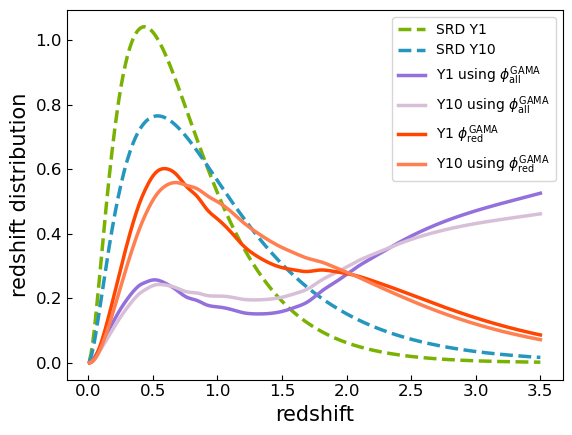

In [5]:
# Set plot parameters
plt.rcParams.update({
    "lines.linewidth": 2.5,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.grid": False,
})

jmas_colors = h.jmas_colors

# Define plot settings
plot_settings = [
    {"key": "srd_y1", "color": jmas_colors["jmas_y1"], "label": "SRD Y1", "linestyle": "--"},
    {"key": "srd_y10", "color": jmas_colors["jmas_y10"], "label": "SRD Y10", "linestyle": "--"},
    #{"key": "jmas_y1", "color": jmas_colors["jmas_y1"], "label": "JMAS Y1"},
    #{"key": "jmas_y10", "color": jmas_colors["jmas_y10"], "label": "JMAS Y10"},
    {"key": "srd_all_y1", "color": "mediumpurple", "label": "Y1 using $\\phi_\\mathrm{all}^\\mathrm{GAMA}$"},
    {"key": "srd_all_y10", "color": "thistle", "label": "Y10 using $\\phi_\\mathrm{all}^\\mathrm{GAMA}$"},
    {"key": "srd_red_y1", "color": "orangered", "label": "Y1 $\\phi_\\mathrm{red}^\\mathrm{GAMA}$"},
    {"key": "srd_red_y10", "color": "coral", "label": "Y10 using $\\phi_\\mathrm{red}^\\mathrm{GAMA}$"}
]

# Plot each line
for setting in plot_settings:
    plt.plot(redshift_range, sources[setting["key"]], 
             c=setting["color"], label=setting["label"], ls=setting.get("linestyle", "-"))

# Final plot settings
plt.legend()
plot_path = "plots_output/redshift_distributions/"
plt.xlabel("redshift", fontsize=15)
plt.ylabel("redshift distribution", fontsize=15)
plt.savefig(f"{plot_path}srd_nz_w_gama_lf.pdf",
            bbox_inches="tight",
            dpi=dpi["pdf"])
plt.savefig(f"{plot_path}srd_nz_w_gama_lf.png",
            bbox_inches="tight",
            dpi=dpi["png"])
